# EDA on Spin Rate Data

In [79]:
from functions import *
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

Commented out the "get_data" function to avoid overwriting current file. This can be avoided by increasing the third parameter in the get_data function by 1. (e.g. 11 => 12)

In [7]:
# get_data('2018-04-01','2021-06-15', 11)

In [8]:
eda = pd.read_csv('../data/pitching_masterfile10.csv')
                  
eda.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,CU,2021-06-07,84.8,-2.53,5.52,"Abbott, Cory",605170,676265,strikeout,called_strike,...,4,4,9,9,4,Infield shift,Standard,18.0,0.0,-0.274
1,FF,2021-06-07,92.4,-2.46,5.47,"Abbott, Cory",605170,676265,NaN,foul,...,4,4,9,9,4,Infield shift,Standard,214.0,0.0,-0.073
2,FF,2021-06-07,92.7,-2.39,5.25,"Abbott, Cory",605170,676265,NaN,ball,...,4,4,9,9,4,Infield shift,Standard,219.0,0.0,0.049
3,FF,2021-06-07,93.2,-2.55,5.41,"Abbott, Cory",605170,676265,NaN,foul,...,4,4,9,9,4,Infield shift,Standard,214.0,0.0,-0.053
4,CH,2021-06-07,87.6,-2.31,5.58,"Abbott, Cory",605170,676265,NaN,ball,...,4,4,9,9,4,Infield shift,Standard,237.0,0.0,0.021


In [10]:
#1.5+ million pitches
eda.shape

(1527792, 92)

In [16]:
#699 pitchers

eda['player_name'].nunique()

699

We filter for just fastballs because it is the pitch type that pitchers will most likely have in common. Spin rate increases for fastballs and breaking pitches, so fastball spin rates will be analyzed.

In [22]:
#filter for fastballs, takes the down to a 1/3 of original size

fastball_df = eda.copy().loc[(eda['pitch_type'] == 'FF') & (eda['release_spin_rate'])]

fastball_df.shape

(544103, 92)

In [23]:
fastball_df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
1,FF,2021-06-07,92.4,-2.46,5.47,"Abbott, Cory",605170,676265,NaN,foul,...,4,4,9,9,4,Infield shift,Standard,214.0,0.000,-0.073
2,FF,2021-06-07,92.7,-2.39,5.25,"Abbott, Cory",605170,676265,NaN,ball,...,4,4,9,9,4,Infield shift,Standard,219.0,0.000,0.049
3,FF,2021-06-07,93.2,-2.55,5.41,"Abbott, Cory",605170,676265,NaN,foul,...,4,4,9,9,4,Infield shift,Standard,214.0,0.000,-0.053
5,FF,2021-06-07,92.9,-2.34,5.52,"Abbott, Cory",657434,676265,double,hit_into_play,...,4,4,9,9,4,Infield shift,Standard,217.0,0.007,0.738
6,FF,2021-06-07,93.0,-2.40,5.24,"Abbott, Cory",657434,676265,NaN,ball,...,4,4,8,8,4,Infield shift,Standard,218.0,0.000,0.040


In [24]:
#filters 51 pitchers that do not throw a four seam fastabll
fastball_df['player_name'].nunique()

648

In [25]:
fastball_df.dtypes[:5]

pitch_type        object
game_date         object
release_speed    float64
release_pos_x    float64
release_pos_z    float64
dtype: object

In [26]:
fastball_df['game_date'] = pd.to_datetime(fastball_df['game_date'])
fastball_df.dtypes[:5]

pitch_type               object
game_date        datetime64[ns]
release_speed           float64
release_pos_x           float64
release_pos_z           float64
dtype: object

Analyze fastball spin rate by year to note the year to year changes and identify foreign substance abusers.

In [30]:
fastball_df.set_index("game_date", inplace = True)

fastball_df.head()

,pitch_type,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
game_date,,,,,,,,,,,,,,,,,,,,,
2021-06-07,FF,92.4,-2.46,5.47,"Abbott, Cory",605170,676265,NaN,foul,NaN,...,4,4,9,9,4,Infield shift,Standard,214.0,0.000,-0.073
2021-06-07,FF,92.7,-2.39,5.25,"Abbott, Cory",605170,676265,NaN,ball,NaN,...,4,4,9,9,4,Infield shift,Standard,219.0,0.000,0.049
2021-06-07,FF,93.2,-2.55,5.41,"Abbott, Cory",605170,676265,NaN,foul,NaN,...,4,4,9,9,4,Infield shift,Standard,214.0,0.000,-0.053
2021-06-07,FF,92.9,-2.34,5.52,"Abbott, Cory",657434,676265,double,hit_into_play,NaN,...,4,4,9,9,4,Infield shift,Standard,217.0,0.007,0.738
2021-06-07,FF,93.0,-2.40,5.24,"Abbott, Cory",657434,676265,NaN,ball,NaN,...,4,4,8,8,4,Infield shift,Standard,218.0,0.000,0.040


In [32]:
fastball_df_2018 = fastball_df.copy().loc['2018']

fastball_df_2018.head(3)

,pitch_type,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
game_date,,,,,,,,,,,,,,,,,,,,,
2018-08-17,FF,91.0,-3.11,5.91,"Adam, Jason",547170,592094,home_run,hit_into_play,NaN,...,3,3,9,9,3,Standard,Standard,208.0,0.040,2.339
2018-08-17,FF,92.4,-3.11,5.85,"Adam, Jason",641313,592094,NaN,ball,NaN,...,3,3,5,5,3,Standard,Standard,217.0,0.000,0.058
2018-08-17,FF,92.6,-3.27,5.71,"Adam, Jason",553882,592094,walk,blocked_ball,NaN,...,3,3,5,5,3,Standard,Standard,212.0,0.005,0.114


In [33]:
fastball_df_2019 = fastball_df.copy().loc['2019']

fastball_df_2019.head(3)

,pitch_type,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
game_date,,,,,,,,,,,,,,,,,,,,,
2019-10-12,FF,94.7,-2.22,5.74,"Abreu, Bryan",592450,650556,single,hit_into_play,NaN,...,0,6,0,6,0,Infield shift,Standard,211.0,0.0,0.277
2019-10-12,FF,95.0,-2.14,5.76,"Abreu, Bryan",518934,650556,walk,ball,NaN,...,0,6,0,6,0,Standard,Standard,207.0,0.0,0.157
2019-10-12,FF,96.1,-2.05,5.87,"Abreu, Bryan",518934,650556,NaN,called_strike,NaN,...,0,6,0,6,0,Standard,Standard,208.0,0.0,-0.050


In [34]:
fastball_df_2020 = fastball_df.copy().loc['2020']

fastball_df_2020.head(3)

,pitch_type,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
game_date,,,,,,,,,,,,,,,,,,,,,
2020-09-03,FF,97.5,-2.57,5.56,"Abreu, Albert",624413,656061,home_run,hit_into_play,NaN,...,7,7,9,9,7,Standard,Standard,226.0,0.193,1.440
2020-09-03,FF,98.4,-2.61,5.45,"Abreu, Albert",624413,656061,NaN,called_strike,NaN,...,7,7,7,7,7,Standard,Standard,230.0,0.000,-0.067
2020-08-08,FF,95.6,-2.47,5.45,"Abreu, Albert",596847,656061,strikeout,swinging_strike,NaN,...,1,1,5,5,1,Standard,Standard,241.0,-0.002,-0.538


In [35]:
fastball_df_2021 = fastball_df.copy().loc['2021']

fastball_df_2021.head(3)

,pitch_type,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
game_date,,,,,,,,,,,,,,,,,,,,,
2021-06-07,FF,92.4,-2.46,5.47,"Abbott, Cory",605170,676265,NaN,foul,NaN,...,4,4,9,9,4,Infield shift,Standard,214.0,0.0,-0.073
2021-06-07,FF,92.7,-2.39,5.25,"Abbott, Cory",605170,676265,NaN,ball,NaN,...,4,4,9,9,4,Infield shift,Standard,219.0,0.0,0.049
2021-06-07,FF,93.2,-2.55,5.41,"Abbott, Cory",605170,676265,NaN,foul,NaN,...,4,4,9,9,4,Infield shift,Standard,214.0,0.0,-0.053


In [48]:
spinrates_2018 = fastball_df_2018.groupby(by = 'player_name')[['release_spin_rate']].mean()
spinrates_2018.head()

,release_spin_rate
player_name,
"Adam, Jason",2579.658046
"Adams, Austin",2500.153846
"Alcantara, Sandy",2275.900000
"Alexander, Scott",2246.000000
"Allard, Kolby",1978.550000


In [49]:
spinrates_2019 = fastball_df_2019.groupby(by = 'player_name')[['release_spin_rate']].mean()
spinrates_2019.head()

,release_spin_rate
player_name,
"Abreu, Bryan",2219.773585
"Adam, Jason",2580.481481
"Adams, Austin",2601.028736
"Alcala, Jorge",2340.368421
"Alcantara, Sandy",2356.397642


In [50]:
spinrates_2020 = fastball_df_2020.groupby(by = 'player_name')[['release_spin_rate']].mean()
spinrates_2020.head()

,release_spin_rate
player_name,
"Abreu, Albert",2018.181818
"Abreu, Bryan",2257.153846
"Adam, Jason",2727.575540
"Adams, Austin",2682.076923
"Akin, Keegan",2389.300000


In [51]:
spinrates_2021 = fastball_df_2021.groupby(by = 'player_name')[['release_spin_rate']].mean()
spinrates_2021.head()

,release_spin_rate
player_name,
"Abbott, Cory",2406.956522
"Abreu, Albert",2159.535714
"Abreu, Bryan",2228.947368
"Adam, Jason",2607.864078
"Adams, Austin",2639.318182


In [52]:
# pd.merge(fastball_df_2018, fastball_df_2019, n=['player_name'], how='outer')

The technique below merges multiple dataframes on an outer join when given a list. This was borrowed from [here](https://stackoverflow.com/questions/44327999/python-pandas-merge-multiple-dataframes).

In [70]:
data_frames = [spinrates_2018, spinrates_2019, spinrates_2020, spinrates_2021]

spinrates = reduce(lambda  left, right: pd.merge(left,right,on=['player_name'],
                                            how='outer'), data_frames)

spinrates.columns = ['release_spin_rate_2018', 'release_spin_rate_2019','release_spin_rate_2020','release_spin_rate_2021']

spinrates.head()

,release_spin_rate_2018,release_spin_rate_2019,release_spin_rate_2020,release_spin_rate_2021
player_name,,,,
"Adam, Jason",2579.658046,2580.481481,2727.575540,2607.864078
"Adams, Austin",2500.153846,2601.028736,2682.076923,2639.318182
"Alcantara, Sandy",2275.900000,2356.397642,2331.847015,2321.786713
"Alexander, Scott",2246.000000,NaN,2175.000000,NaN
"Allard, Kolby",1978.550000,2108.730077,2171.420195,2210.295139


In [76]:
spinrates['delta_2021'] = spinrates['release_spin_rate_2021'] - spinrates['release_spin_rate_2020']
spinrates['delta_2020'] = spinrates['release_spin_rate_2020'] - spinrates['release_spin_rate_2019']
spinrates['delta_2019'] = spinrates['release_spin_rate_2019'] - spinrates['release_spin_rate_2018']
spinrates.head()

,release_spin_rate_2018,release_spin_rate_2019,release_spin_rate_2020,release_spin_rate_2021,delta_2021,delta_2020,delta_2019
player_name,,,,,,,
"Adam, Jason",2579.658046,2580.481481,2727.575540,2607.864078,-119.711462,147.094058,0.823436
"Adams, Austin",2500.153846,2601.028736,2682.076923,2639.318182,-42.758741,81.048187,100.874889
"Alcantara, Sandy",2275.900000,2356.397642,2331.847015,2321.786713,-10.060302,-24.550627,80.497642
"Alexander, Scott",2246.000000,NaN,2175.000000,NaN,NaN,NaN,NaN
"Allard, Kolby",1978.550000,2108.730077,2171.420195,2210.295139,38.874943,62.690118,130.180077


In [75]:
spinrates.sort_values(by = 'delta_2021', ascending = False)[:30]

,release_spin_rate_2018,release_spin_rate_2019,release_spin_rate_2020,release_spin_rate_2021,delta_2021
player_name,,,,,
"Tapia, Domingo",NaN,NaN,2321.033333,2597.200000,276.166667
"Ramirez, Nick",NaN,2031.824627,2001.038462,2257.000000,255.961538
"Kittredge, Andrew",2168.396476,2351.350993,2394.333333,2618.863636,224.530303
"Keller, Kyle",NaN,2400.396947,2211.833333,2433.312500,221.479167
"White, Mitch",NaN,NaN,2301.294118,2518.913907,217.619790
"Stammen, Craig",2219.000000,2129.000000,2000.518519,2214.500000,213.981481
"Cleavinger, Garrett",NaN,NaN,2159.800000,2352.765432,192.965432
"Beasley, Jeremy",NaN,NaN,2356.666667,2549.590361,192.923695
"Hernández, Carlos",NaN,NaN,2212.400000,2402.136364,189.736364


In [77]:
spinrates.sort_values(by = 'delta_2020', ascending = False)[:30]

,release_spin_rate_2018,release_spin_rate_2019,release_spin_rate_2020,release_spin_rate_2021,delta_2021,delta_2020,delta_2019
player_name,,,,,,,
"Bauer, Trevor",2324.470315,2410.376027,2778.962134,2815.008489,36.046355,368.586107,85.905712
"Reed, Cody",2013.193333,1800.000000,2141.745763,2248.400000,106.654237,341.745763,-213.193333
"Mazza, Chris",NaN,1776.888889,2080.428571,2029.454545,-50.974026,303.539683,NaN
"Boxberger, Brad",2266.284360,2212.466387,2492.694323,2476.319797,-16.374526,280.227937,-53.817974
"Scott, Tanner",2419.669187,2412.392996,2657.409756,2584.459016,-72.950740,245.016760,-7.276191
"Ginkel, Kevin",NaN,2144.612150,2387.300493,2387.669014,0.368521,242.688343,NaN
"Mahle, Tyler",2137.928930,2161.354627,2388.715812,2449.098170,60.382358,227.361185,23.425697
"Reyes, Alex",2234.903226,2330.500000,2542.968912,2467.617512,-75.351400,212.468912,95.596774
"Wood, Alex",1851.000000,2016.250000,2225.500000,NaN,NaN,209.250000,165.250000


In [78]:
spinrates.sort_values(by = 'delta_2019', ascending = False)[:30]

,release_spin_rate_2018,release_spin_rate_2019,release_spin_rate_2020,release_spin_rate_2021,delta_2021,delta_2020,delta_2019
player_name,,,,,,,
"Bumgarner, Madison",2081.497731,2405.165587,2394.659420,2493.949062,99.289641,-10.506166,323.667856
"Suero, Wander",2207.441176,2470.500000,NaN,2499.500000,NaN,NaN,263.058824
"Sims, Lucas",2392.062069,2641.420213,2774.109705,2644.385027,-129.724678,132.689492,249.358144
"Giolito, Lucas",2098.544000,2332.673127,2356.510479,2426.552347,70.041868,23.837352,234.129127
"Smith, Burch",2052.773256,2279.197026,2443.618182,2518.209756,74.591574,164.421156,226.423770
"Alvarado, José",1995.714286,2221.000000,NaN,2133.935484,NaN,NaN,225.285714
"Santana, Dennis",2439.333333,2656.000000,2446.000000,2615.428571,169.428571,-210.000000,216.666667
"Davis, Austin",2219.142857,2430.228814,2292.985075,2345.333333,52.348259,-137.243739,211.085956
"Means, John",2166.280000,2376.077827,2458.464103,2423.636697,-34.827405,82.386276,209.797827


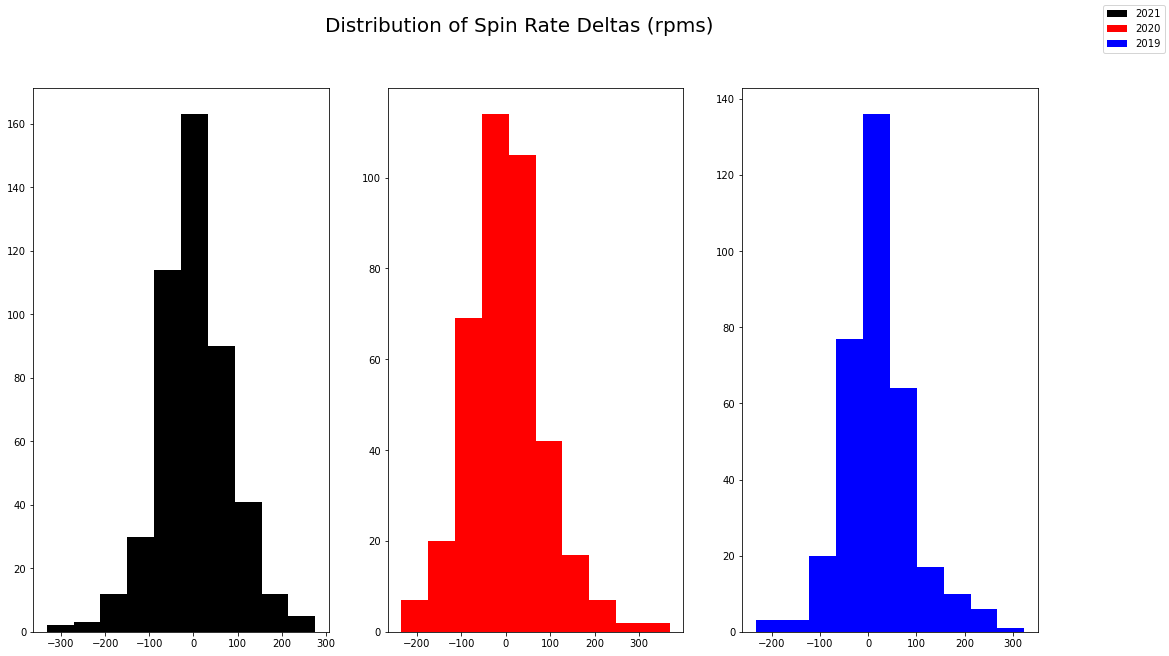

In [93]:
fig.set_figheight(10)
fig.set_figwidth(12)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Distribution of Spin Rate Deltas (rpms)', fontsize = 20)
ax1.hist(spinrates['delta_2021'], label = 2021, color = 'black')
ax2.hist(spinrates['delta_2020'], label = 2020, color = 'red')
ax3.hist(spinrates['delta_2019'], label = 2019, color = 'blue')

fig.set_figheight(10)
fig.set_figwidth(18)
fig.legend();


[spider tack](https://www.click2houston.com/sports/2021/06/28/putting-spider-tack-and-other-mlb-substances-to-the-test/)

[pine tar](https://digg.com/2014/what-is-pine-tar-and-why-is-it-illegal-in-baseball)